In [1]:
import pandas as pd
import missingno as msno
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, robust_scale

In [2]:
import scipy.stats

In [3]:
df=pd.read_csv("/home/ha-brek/Devia_AI/Data/data_assurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot: >

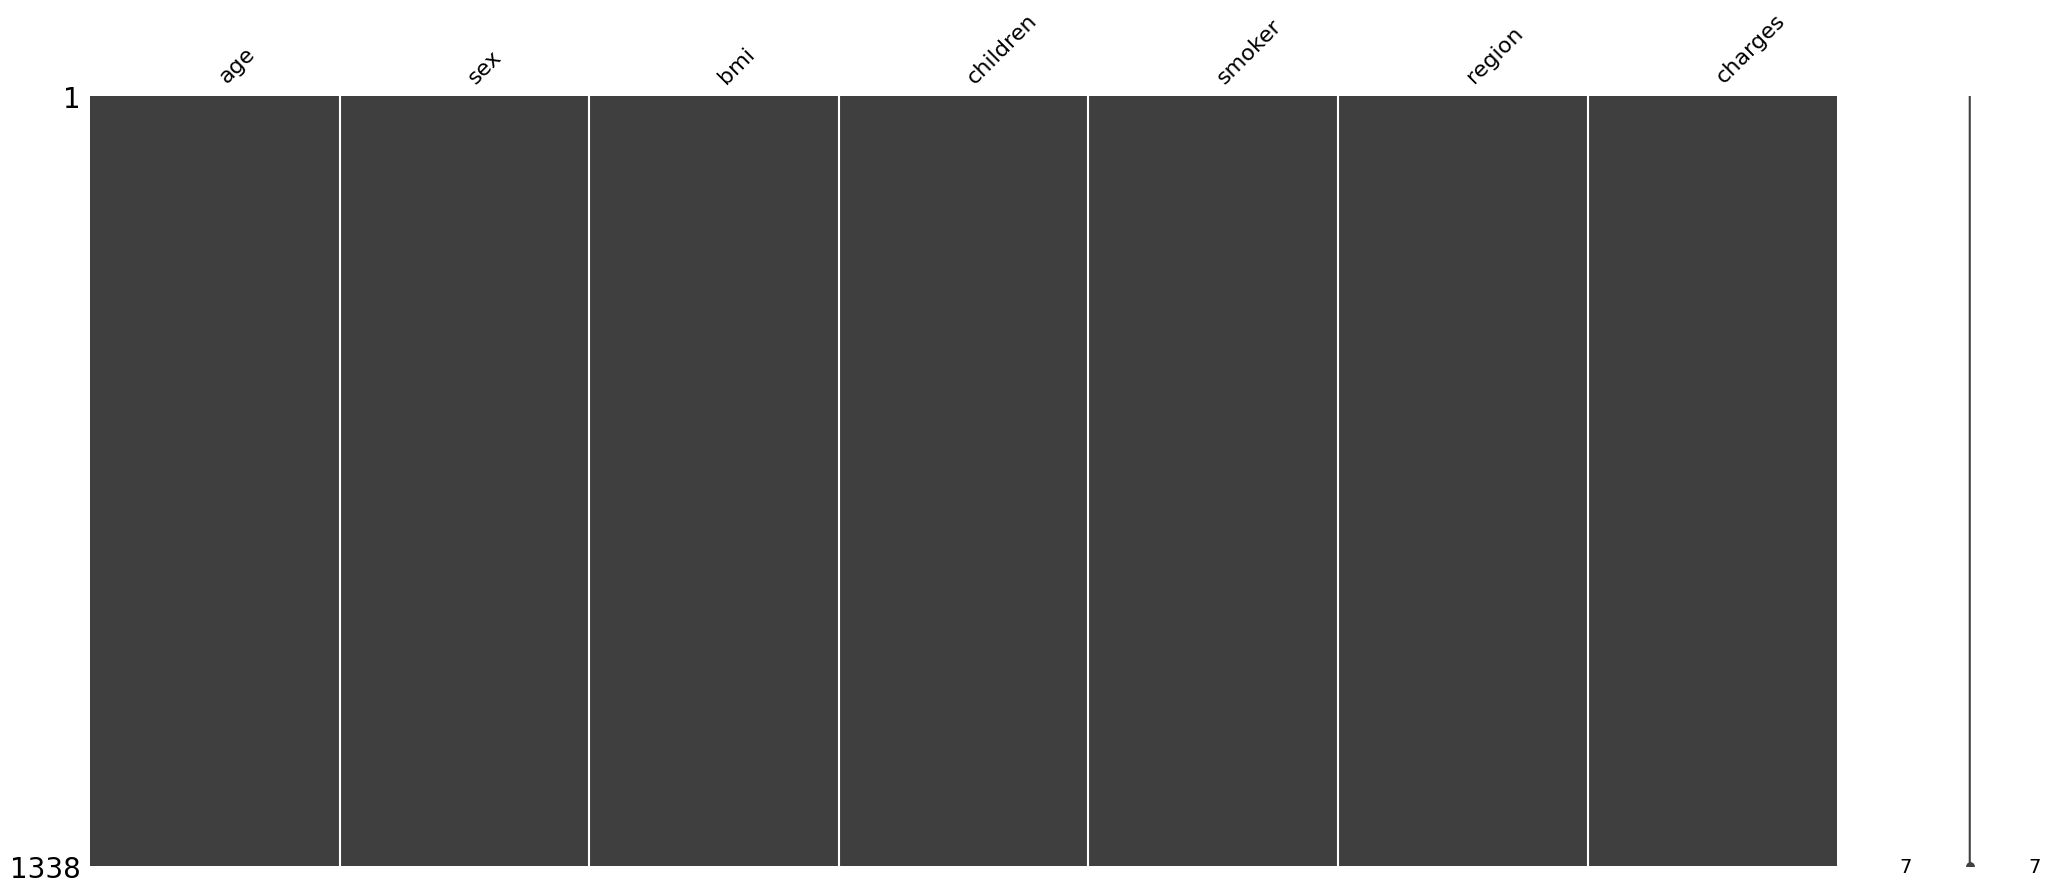

In [4]:
msno.matrix(df)

In [5]:
mask = df.isnull()
mask

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
missing_values_count = mask.sum()
missing_values_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.loc[df.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
VALID_REGION = ['southwest', 'southeast', 'northwest', 'northeast']
mask = ~df['region'].isin(VALID_REGION)
df.loc[mask, 'region'] = np.NaN


/tmp/ipykernel_46118/2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<AxesSubplot: xlabel='age', ylabel='Density'>

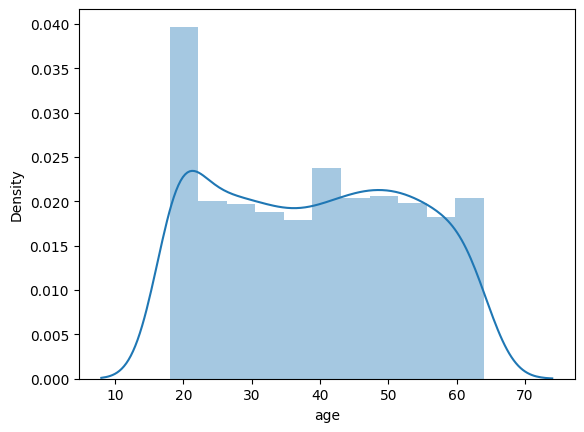

In [9]:
sns.distplot(df.age)

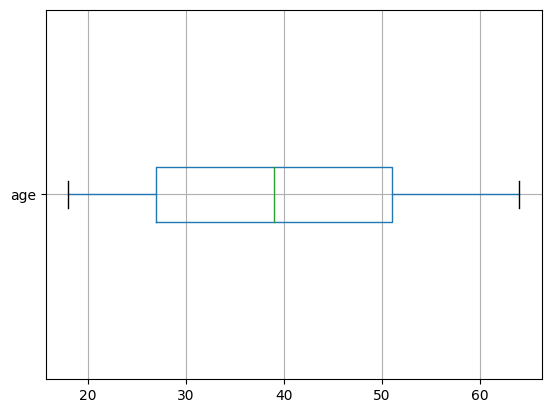

In [10]:
df.boxplot(column="age", vert=False)
plt.show()

In [11]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [12]:
shapiro_results = scipy.stats.shapiro(df['age'].values)
shapiro_results

ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal


/tmp/ipykernel_46118/3450038586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges)


<AxesSubplot: xlabel='charges', ylabel='Density'>

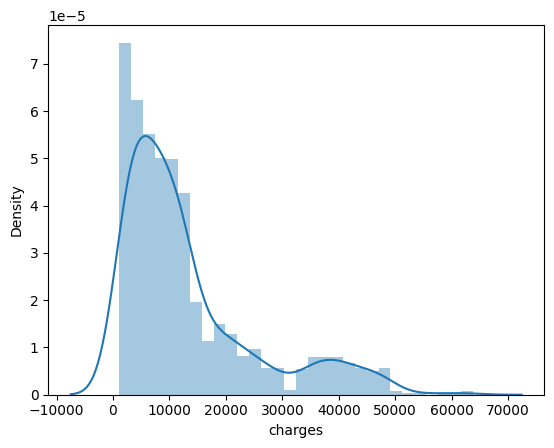

In [13]:
sns.distplot(df.charges)

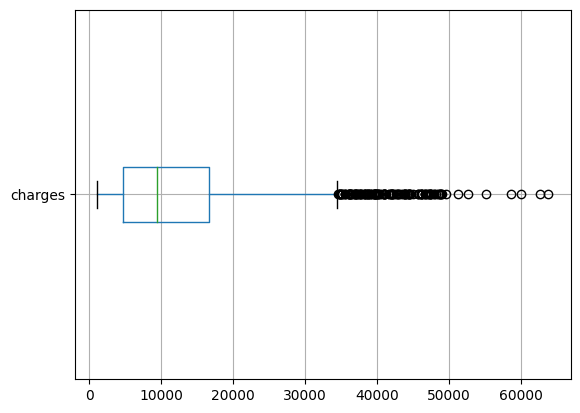

In [14]:
df.boxplot(column="charges", vert=False)
plt.show()

In [15]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [16]:
shapiro_results = scipy.stats.shapiro(df['charges'].values)
shapiro_results

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal

In [17]:
# df['log_charges'] = np.log(df['charges'])


In [18]:
# sns.distplot(df.log_charges)

In [19]:
# shapiro_results = scipy.stats.shapiro(df['log_charges'].values)
# shapiro_results

/tmp/ipykernel_46118/2420122515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi)


<AxesSubplot: xlabel='bmi', ylabel='Density'>

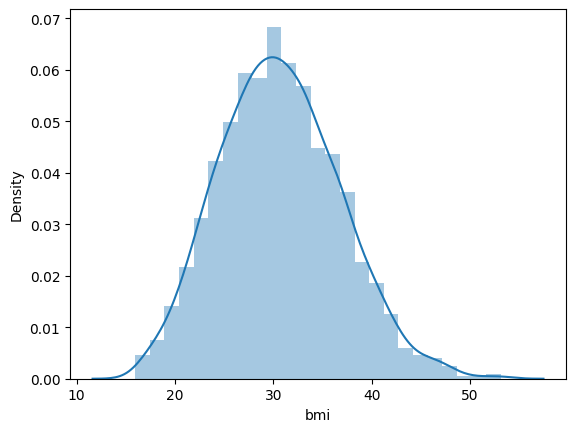

In [20]:
sns.distplot(df.bmi)

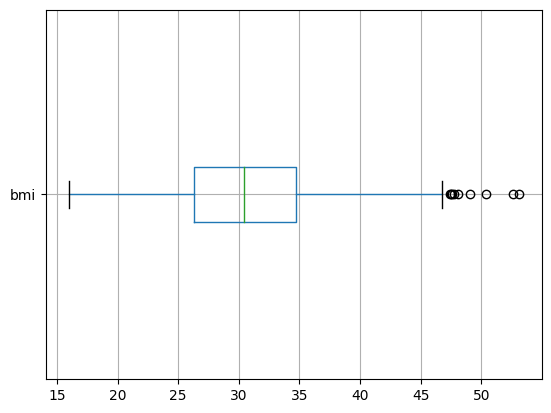

In [21]:
df.boxplot(column="bmi", vert=False)
plt.show()

In [22]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [23]:
shapiro_results = scipy.stats.shapiro(df['bmi'].values)
shapiro_results

ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal

<AxesSubplot: title={'center': 'Analyse univariée de la variable sexe'}, ylabel='sex'>

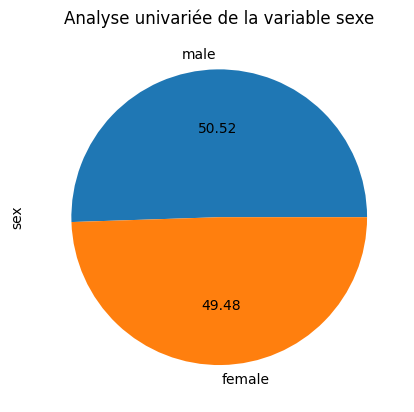

In [24]:
freq_genre = df.sex.value_counts(normalize=True)

plt.title('Analyse univariée de la variable sexe')
freq_genre.plot(kind="pie",autopct='%.2f')

<AxesSubplot: title={'center': 'Analyse univariée de la variable fumeur'}, ylabel='smoker'>

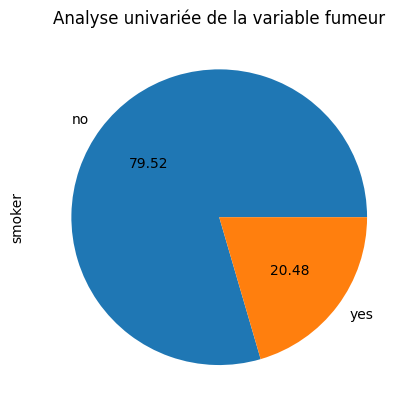

In [25]:
freq_smoker = df.smoker.value_counts(normalize=True)



plt.title('Analyse univariée de la variable fumeur')
freq_smoker.plot(kind="pie",autopct='%.2f')

<AxesSubplot: title={'center': 'Analyse univariée de la variable region'}, ylabel='region'>

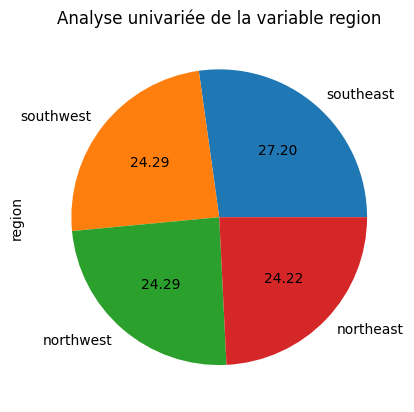

In [26]:
freq_region = df.region.value_counts(normalize=True)



plt.title('Analyse univariée de la variable region')
freq_region.plot(kind="pie",autopct='%.2f')

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64


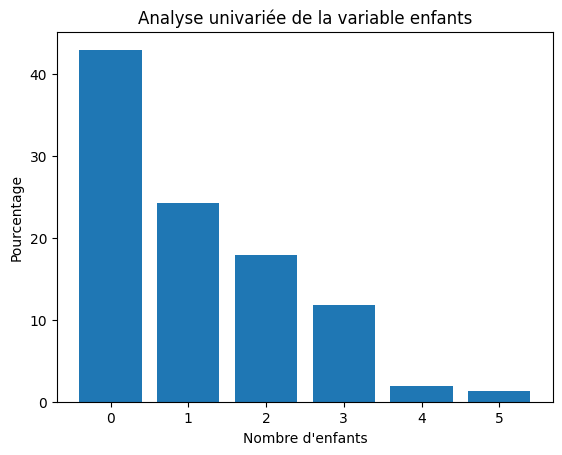

In [27]:
# Calculer la fréquence
frequency = df['children'].value_counts()

# Calculer le pourcentage
percentage = df['children'].value_counts(normalize=True)*100

# Afficher les résultats
print(frequency)
print(percentage)

# Créer le graphique 
plt.bar(frequency.index, percentage)
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Pourcentage')
plt.title('Analyse univariée de la variable enfants')
plt.show()

In [28]:
df_continue = df[["age","bmi","charges"]]

In [29]:

charges_corr = df_continue.corr()['charges'].sort_values() 

print(charges_corr) 

bmi        0.198341
age        0.299008
charges    1.000000
Name: charges, dtype: float64


In [30]:
df['sex_binary'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)

In [31]:
len(df.charges)

1338

In [32]:
len(df.sex_binary)

1338

In [33]:
df.sex_binary.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex_binary, Length: 1338, dtype: int64>

In [34]:
scipy.stats.pearsonr(df.charges, df.sex_binary)

PearsonRResult(statistic=0.057292062202025346, pvalue=0.03613272100594507)

In [35]:
scipy.stats.pearsonr(df.charges, df.children)

PearsonRResult(statistic=0.06799822684790481, pvalue=0.012852128520141125)

In [36]:
df['smoker_binary'] = df['smoker'].apply(lambda x: 1 if x == 'no' else 0)

In [37]:
scipy.stats.pearsonr(df.charges, df.smoker_binary)

PearsonRResult(statistic=-0.7872514304984775, pvalue=8.271435842176839e-283)

In [38]:
df['region_num'] = df['region'].map({'northwest':1,'northeast':2,'southeast':3,'southwest':4})


In [39]:
scipy.stats.pearsonr(df.charges, df.region_num)

PearsonRResult(statistic=0.011740854806590255, pvalue=0.6678661746775458)


### Partie modélisation :


Dans vos variables explicatives Si les distributions ne sont pas normales, appliquer une transformation logarithmique.
Pensez à fixer le hasard grâce à seeds et des random states.
Étant donné que la variable à prédire est continue, c’est un problème de régression. Je vous conseille d’utiliser les algorithmes suivants : régression linéaire, Lasso, Ridge et ElasticNet. Sklearn dispose d’implémentation pour chacun de ses modèles. Comparer vos modèles à l'aide du R2 et du RMSE.
Si vous avez besoin d’effectuer du pré-traitement des données (standardisation, encodage des données catégorielles, etc.) Je te conseille de passer par un pipeline avec sklearn.
Analysez vos résultats avec une approche statistique grâce à ce cours : https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes
Étant donné que vous disposez de peu de variables vous pouvez essayer de booster vos résultats grâce à un PolynomialFeature.
Sélectionner vos hyperparamètres grâce à des GridSearchCV et RandomSearchCV.
Sélectionner votre modèle ayant les meilleurs résultats et interpréter vos résultats, par exemple : quels sont les variables les plus importantes pour votre modèle.



In [40]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [41]:
df=pd.read_csv("/home/ha-brek/Devia_AI/Data/data_assurance.csv")


In [42]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [43]:
# Remplacer 'bmi' par le nom de votre colonne de BMI et 'df' par le nom de votre DataFrame
bmi = X['bmi']

# Définissez les bornes de chaque catégorie de BMI
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]

# Utilisez la fonction 'cut' pour transformer les valeurs de BMI en catégories
bmi_categories = pd.cut(bmi, bins, labels=['Underweight', 'Normal weight', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'])

# Ajoutez la colonne de catégories de BMI à votre DataFrame
X['bmi'] = bmi_categories

In [44]:
X["children"]=X["children"].replace({0:"zero",1:'one',2:'two',3:'three',4:'Four',5:'five'})


In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.0009192486886582252

In [46]:
X 

,age,sex,bmi,children,smoker,region
0,19,female,Overweight,zero,yes,southwest
1,18,male,Obese Class I,one,no,southeast
2,28,male,Obese Class I,three,no,southeast
3,33,male,Normal weight,zero,no,northwest
4,32,male,Overweight,zero,no,northwest
...,...,...,...,...,...,...
1333,50,male,Obese Class I,three,no,northwest
1334,18,female,Obese Class I,zero,no,northeast
1335,18,female,Obese Class II,zero,no,southeast
1336,21,female,Overweight,zero,no,southwest


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
#X_encoder=pd.get_dummies(X)

In [49]:
from sklearn.pipeline import Pipeline,FeatureUnion,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import GridSearchCV


cols_to_encode = [ "sex","smoker","bmi","children" ]
cols_to_norm = [ "age"]
preprocessor = ColumnTransformer(
    [('Encoder',  OneHotEncoder() , cols_to_encode),('scaler',  RobustScaler() , cols_to_norm)],

)



In [50]:
X_train.shape

(1070, 6)

### LinearRegression

In [51]:
model =make_pipeline(preprocessor, LinearRegression())
model.fit(X_train,y_train)

cross_val_score(model, X_train, y_train ).mean()

0.7379581332809644

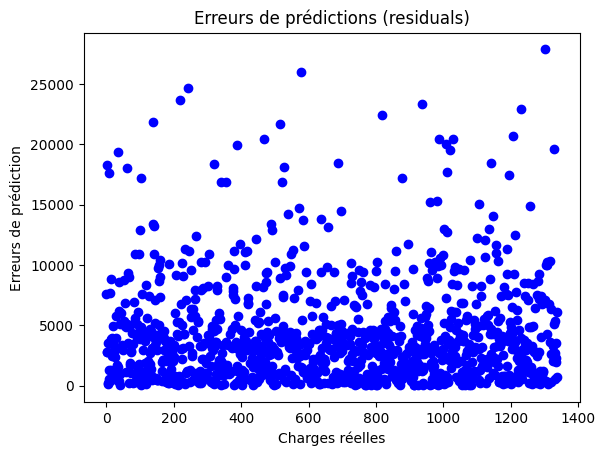

In [52]:
y_pred = model.predict(X_train)

residual =(y_pred-y_train).abs()

plt.scatter(y_train.index, residual, color="blue")
plt.title("Erreurs de prédictions (residuals)")
plt.xlabel("Charges réelles")
plt.ylabel("Erreurs de prédiction")
plt.show()
# Filter the residuals greater than 20000 


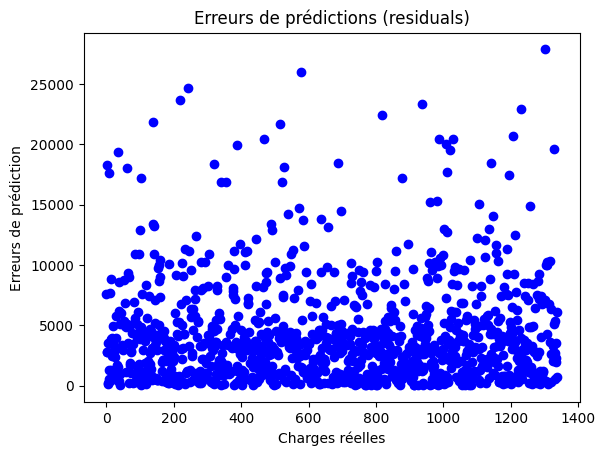

In [53]:


plt.scatter(y_train.index, residual, color="blue")
plt.title("Erreurs de prédictions (residuals)")
plt.xlabel("Charges réelles")
plt.ylabel("Erreurs de prédiction")
plt.show()
# Filter the residuals greater than 20000 


In [54]:
# Filter the residuals greater than 20000 
residual_to_drop = residual[residual> 15000].index
residual_to_drop

Int64Index([1142,  140,  526,  987,  355, 1008,  321,  242, 1328,    3,   62,
               9,  936,  516,  468, 1230,  688, 1027,  340, 1206,  819,  876,
             102, 1195,  980, 1019,  959, 1300,  219, 1012,  577,  520, 1104,
              34,  387],
           dtype='int64')

In [55]:
X_train_new = X_train.drop(residual_to_drop)
y_train_new = y_train.drop(residual_to_drop)

# X_train_new = X_train
# y_train_new = y_train

In [56]:
y_train_new.shape

(1035,)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    """Calculate VIF for each feature."""
    vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif_df = pd.DataFrame({'vif': vif}, index=X.columns)
    return vif_df

class VIFTransformer:
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        vif = calculate_vif(X)
        # You can filter the vif dataframe with a specific threshold 
        vif_filtered = vif[vif['vif'] < 10]
        X_filter = X[vif_filtered.index]
        return X_filter
    

In [70]:
def transform(self, X_train_new, y=None):
        vif = calculate_vif(X_train_new)
        # You can filter the vif dataframe with a specific threshold 
        vif_filtered = vif[vif['vif'] < 10]
        X_train_new = X_train_new[vif_filtered.index]
        return X_train_new

In [78]:

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in range(4,8):   
    model_linear = make_pipeline(preprocessor, PolynomialFeatures(),VIFTransformer(),LinearRegression())
    params = {
        'polynomialfeatures__degree':[1,2,3],
    }

    grid = GridSearchCV(model_linear, params, cv=i,error_score='raise')
    grid.fit(X_train_new, y_train_new)
    print(grid.best_score_)
    print(cross_val_score(grid, X_train_new, y_train_new ).mean())


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

### Las


### Elastic Net

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet


model_elasticnet = make_pipeline(preprocessor, PolynomialFeatures(),ElasticNet())
params = {
    'polynomialfeatures__degree':[1,2,3],
    'elasticnet__alpha':[7,8,9,10],
    'elasticnet__l1_ratio': [0,0.5,1]
}

grid = GridSearchCV(model_elasticnet, params, cv=5)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_train_new,y_train_new))


#cross_val_score(grid, X_train_new, y_train_new ).mean()

{'elasticnet__alpha': 10, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.9266838751537309
0.9347023972921583


## LinearRegression

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
model_linear = make_pipeline(preprocessor, PolynomialFeatures(),LinearRegression())
params = {
    'polynomialfeatures__degree':[1,2,3],
}

grid = GridSearchCV(model_linear, params, cv=i)
grid.fit(X_train_new, y_train_new)
print(grid.best_score_)
print(cross_val_score(grid, X_train_new, y_train_new ).mean())


0.9228938369273509
0.9234946508039746


### cooK_distance

In [60]:
from sklearn.preprocessing import FunctionTransformer
from statsmodels.regression.linear_model import OLS

model_elasticnet = make_pipeline(preprocessor, PolynomialFeatures(degree=2),ElasticNet(alpha=8, l1_ratio=1))

model_elasticnet.fit(X_train_new, y_train_new)
y_train_pred = model_elasticnet.predict(X_train_new)

#fit the model
model = OLS(y_train_new, y_train_pred).fit()

# get influence information
influence = model.get_influence()


# get the cook distance
cook_distance_ = influence.cooks_distance[0]
cook_distance_
cook_distance_df = pd.DataFrame(cook_distance_, columns=['cook_distance'],index=X_train_new.index)
cook_distance_df

,cook_distance
560,8.823933e-06
1285,2.930012e-07
969,2.026578e-07
486,2.510794e-06
170,6.950749e-05
...,...
1095,2.765475e-07
1130,3.927454e-06
1294,5.068046e-06
860,6.520896e-03


In [61]:

#threshold =0.05
threshold = 4/X_train.shape[0]
print(threshold)
cook_to_drop = cook_distance_df[cook_distance_df.cook_distance > threshold].index
cook_to_drop
X_train_new = X_train_new.drop(cook_to_drop)
y_train_new = y_train_new.drop(cook_to_drop)

0.003738317757009346


In [63]:
X_train_new.shape

(1006, 6)

### ElasticNet :

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet


model_elasticnet = make_pipeline(preprocessor, PolynomialFeatures(),ElasticNet())
params = {
    'polynomialfeatures__degree':[1,2,3],
    'elasticnet__alpha':[11,12],
    'elasticnet__l1_ratio': [0.9,1]
}

grid = GridSearchCV(model_elasticnet, params, cv=5)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_train_new,y_train_new))
print(grid.score(X_test,y_test))


{'elasticnet__alpha': 12, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.9640866516933432
0.9677088764530253
0.8843736595153515


### LinearRegression

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
   
model_linear = make_pipeline(preprocessor, PolynomialFeatures(),LinearRegression())
params = {
    'polynomialfeatures__degree':[1,2,3],
}

grid = GridSearchCV(model_linear, params, cv=6)
grid.fit(X_train_new, y_train_new)
print(grid.best_score_)
print(cross_val_score(grid, X_train_new, y_train_new ).mean())
grid.fit(X_train_new, y_train_new)
print(grid.score(X_test, y_test))

0.9617835518569219
0.9621170170369112
0.8837545493481004


### modele de xgboost

In [66]:
import xgboost as xgb

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


model_elasticnet = make_pipeline(preprocessor, PolynomialFeatures(),xgb.XGBRegressor())
params = {
    'polynomialfeatures__degree':[1,2,3],
    'xgbregressor__learning_rate': np.linspace(0.01,0.1,10),
    'xgbregressor__max_depth': [2,3],
    #'xgbregressor__n_estimators': [150,190,240],
}
grid = GridSearchCV(model_elasticnet, params, cv=5)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_train_new,y_train_new))
print(grid.score(X_test,y_test))

#cross_val_score(grid, X_train_new, y_train_new ).mean()

{'polynomialfeatures__degree': 1, 'xgbregressor__learning_rate': 0.08, 'xgbregressor__max_depth': 3}
0.9603205104197123
0.9687206288337207
0.8782340050515343


In [68]:
model = make_pipeline(
    preprocessor,PolynomialFeatures(degree=2), xgb.XGBRegressor(learning_rate= 0.07,max_depth=4)
)
# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_new, y_train_new)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
# Calculer le coefficient de détermination (R2)
r2 = r2_score(y_pred, y_test)
print(model.score(X_train_new, y_train_new))
print(model.score(X_test, y_test))

NameError: name 'r2_score' is not defined